# Los porcentajes en los sondeos de intención de voto

Los sondeos que vemos en prensa los días antes de las elecciones son utilizados por unos y otros para influir en la intención de voto de los votantes, ¿pero sabemos exactamente que significa que estimemos que un determinado partido o candidato va a conseguir un 60% de votos, sabemos interpretar los intervalos de confianza o los errores de muestreo?
Veamos la teoría estadística que hay detras de ellos. 

Vamos a simplificar el problema asumiendo que queremos calcular el porcentaje de personas que van a votar a un determinado candidato. Un "p" por ciento de la población votará a ese candidato, y es ese número el que queremos estimar.

Para ello elegiremos un subconjunto $n$ de la población al que preguntaremos (y asumimos que dicen la verdad, ¡que es mucho asumir!).

En notación matemática significa que tenemos un conjunto de variables aleatorias $X_1, X_2, X_3...X_n$ en el que:
$$X_i=\left\{
                \begin{array}{ll}
                  1 \; \text{si la persona } i \text{ vota  al  candidato}\\
                  0 \; \text{si la persona }i\text{ no vota al candidato}
                \end{array}
              \right.
              $$

y definimos $S_n=X_1+X_2+\cdots+X_n$. Sabemos que si el conjunto se elige con aletoriedad y n es pequeño respecto a N entonces $S_n$ tiene una distribución binomial con parámetros $n$ y $p$ tales que $E[S_n]=np$ y $Var(S_n)=npq$ luego podemos ver que el valor normalizado y estandarizado (media 0 y varianza 1) de $S_n$ es equivalente a  $S_n^{*}=\dfrac{S_n-\mu}{\sigma}=\dfrac{S_n-np}{\sqrt{npq}}$, y por el Teorema del Límite Central sabemos que esa distribución aproxima a una normal.

Ahora nos aplicamos a la tarea principal: calcular una estimación de $p$. A priori elegimos $\bar{p}=S_n/n$, es decir: el porcentaje del nº de personas que nos han dicho que votarán al candidato dentro de la muestra.

Podemos desarrollar esa expresión tal que : $$\bar{p}=S_n/n=S_n/n-p+p=\dfrac{S_n-np}{n}+p=\dfrac{S_n-np}{\sqrt{n}\sqrt{n}}+p=\dfrac{S_n-np}{\sqrt{n}\sqrt{n}\sqrt{pq}}\sqrt{pq}+p=\dfrac{S_n-np}{\sqrt{npq}}\sqrt{\dfrac{pq}{n}}+p=S_n^{*}\sqrt{\dfrac{pq}{n}}+p$$, es decir: $\bar{p}$ es una función lineal de $S_n^{*}$, lo que significa que al aproximar $S_n^*$ a una distribución normal entonces $\bar p$ también la hará. Y con unos parámetros tal que:
$$E[\bar{p}]=E\left[S_n^{*}\sqrt{\dfrac{pq}{n}}+p\right]=p$$ ya que $E\left[S_n^*\right]=0$ y $$Var\left[S_n^{*}\sqrt{\dfrac{pq}{n}}+p\right]=\dfrac{pq}{n}$$ ya que la $Var\left[p\right]=0$, la $Var\left[S_n^*\right]=1$, y la $Var\left[aX+b\right]=a^2Var\left[X\right]$

Y a partir de aquí aplicamos lo que ya conocemos: la probabilidad agregada entre $\pm2\text{ varianzas}=95.4\%$, efectivamente:
$$P\left(\bar{p}-2\sqrt{\dfrac{\bar{p}\bar{q}}{n}}<p<\bar{p}+2\sqrt{\dfrac{\bar{p}\bar{q}}{n}}\right)\approx .954$$

¿Qué nos indica este porcentaje?: que en el 95.4% de las ocasiones en las que realicemos este sondeo el intervalo de confianza de $\pm2\sigma$ entorno al valor estimado $\bar{p}$ incluirá el valor real del porcentaje de población que vota al candidato en cuestión.

Y si queremos que el valor de ese rango sea menor que un $6\%$ (como ejemplo), es decir: un $3\%$ hacia arriba y un $-3\%$ hacia abajo, entonces obligaremos a que $2\sqrt{\dfrac{\bar{p}\bar{q}}{n}}\leq .03$ y como en todo caso $\bar{p}\bar{q}\leq 1/4$ (el caso peor es $max(\bar{p}\bar{q}) \rightarrow p=q=0.5$) , entonces nos queda que $\dfrac{1}{\sqrt{n}}\leq.03$ que equivale a $n\geq1111$.

Es decir: si realizamos sondeos a, al menos, 1111 personas elegidas aleatoriamente nos encontraremos que la $p$ real estará dentro del intervalo $\bar p\pm3\%$, siendo $\bar {p}=S_n/n$, porcentaje del número de personas que indican que le votaran en el sondeo.

# Comprobación práctica con Python

Partimos de una población de un millón de habitantes, a los que vamos a hacer sondeos (elegimos 5000 sondeos= eligiendo aleatoriamente subconjuntos de 1.200 personas, superior a las 1.111 que nos marca la teoría para disponer de un rango de confianza de longitud máxima del 6%. Calcularemos una estimación de $p$ en ese subcojunto, y finalmente representaremos la distribución de esas estimaciones, veamos si se cumple lo indicado por la teoría. 

In [1]:
import pandas as pd
import numpy as np
from scipy.special import comb
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import math

In [2]:
poblacion=np.random.binomial(1,.35,1000000) #un millón de personas de las que un 35% aprox vota al candidato

In [3]:
p_real=poblacion.sum()/1000000
print ('Porcentaje real de voto al candidato p={:.2f}%'.format(p_real*100)) 

Porcentaje real de voto al candidato p=34.94%



Calculamos entonces la media y la desviación teórica de esa distribución si $n=1200$: $ \mu=np$ y $\sigma=\sqrt{\dfrac{pq}{n}}$

In [5]:
n_sondeos=5000
n_entrevistas=1200
media=n_entrevistas*p_real
sigma=np.sqrt(p_real*(1-p_real)/n_entrevistas)
limite=0.03 #3% de amplitud del rango
print ('Parámetros de los sondeos: media ={:.2f} y desviación estándar={:.4f}'.format(media,sigma))

Parámetros de los sondeos: media =419.27 y desviación estándar=0.0138


In [6]:
def sondeos(poblacion_, n_):
    return np.random.choice(poblacion_,n_,replace=False).sum()/n_

In [7]:
resumen_sondeos=np.array([sondeos(poblacion,n_entrevistas) for i in range(5000)])

Calculamos los valores característicos de esa muestra:

In [8]:
print ('Media = {:.2f}'.format(resumen_sondeos.mean()*n_entrevistas))
print ('Desviación típica = {:.4f}'.format(resumen_sondeos.std()))

Media = 419.05
Desviación típica = 0.0140


In [9]:
print ('Frente a los {:.2f} y {:.4f} teóricos'.format(media,sigma))

Frente a los 419.27 y 0.0138 teóricos


(array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.0002, 0.0002, 0.0026, 0.0062, 0.0162, 0.0288, 0.0568,
        0.0796, 0.1148, 0.1382, 0.1592, 0.1328, 0.1004, 0.0766, 0.0444,
        0.0218, 0.0122, 0.006 , 0.002 , 0.0008, 0.0002, 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]),
 array([0.25      , 0.25512821, 0.26025641, 0.26538462, 0.27051282,
        0.27564103, 0.28076923, 0.28589744, 0.29102564, 0.29615385,
        0.30128205, 0.30641026, 0.31153846, 0.31666667, 0.32179487,
        0.32692308, 0.33205128, 0.33717949, 0.34230769, 0.3474359 ,
        0.3525641 , 0.35769231, 0.36282051, 0.36794872, 0.37307692,
        0.37820513, 0.38333333, 0.38846154, 0.39358974, 0.39871795,
        0.40384615, 0.40897436, 0.41410256, 0.41923077, 0.42435897,
        0.42948718, 0.43461538, 0.43974359, 0.44487179, 0.45      ]),
 <a list of 39 Patch objects>)

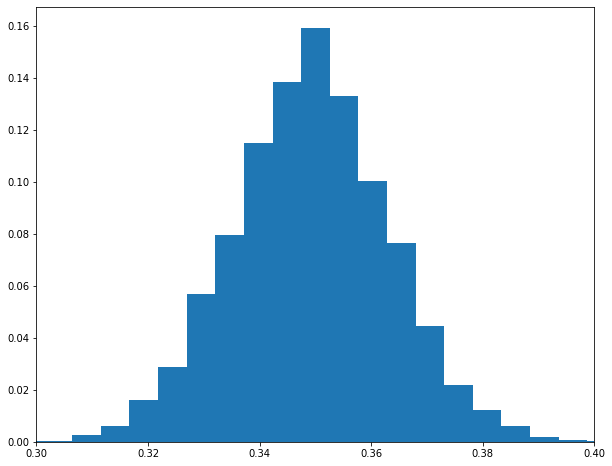

In [10]:
N_bins=np.linspace(.25,.45,40)
n_decimales=2
f = plt.figure(figsize=(10,8))
f.subplots_adjust(hspace=1, wspace=1)
ax1 = f.add_subplot(111)
ax1.set_xlim(.3,.4)
counts, bins = np.histogram(resumen_sondeos,bins=N_bins)
ax1.hist(bins[:-1],bins,weights=counts/counts.sum())

In [11]:
counts.sum()

5000

Veamos ahora en cuantos sondeos se cumple que el porcentaje real, $p$, está dentro del intervalo de confianza $\pm2\sigma\%$

In [12]:
correctos=np.array([abs(p_real-i)<=limite for i in resumen_sondeos])

In [15]:
correctos.sum() >= 5000*.954

True

In [16]:
correctos.sum()/n_sondeos

0.9668

Efectivamente, en ese porcentaje de ocasiones el intervalo de confianza del resultado, $\bar{p}\pm2\sigma$ contendrá el porcentaje $p$ real de voto del candidato. Con lo que cumple la regla del 95%